#### 0. Import all modules

In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_May_week3_Weighted_mean_calculation_Schwope_2002.ipynb*
2022_May_week3_Weighted_mean_calculation_Schwope_2002_01.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_02.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_03.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_04.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_05.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_06.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_07.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_08.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_09.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_combined.out
OC_Schwope_2002.jpg
Schwope_2002.dat*
Schwope_2002.out
Weighted_mean_calculation_gp1.txt
Weighted_mean_calculation_gp2.txt
Weighted_mean_calculation_gp3.txt
Weighted_mean_calculation_gp4.txt
Weighted_mean_calculation_gp5.txt
Weighted_mean_calculation_gp6.txt
Weighted_mean_calculation_gp7.txt
Weighted_mean_calculation_gp8.

#### 1. Read input file: Schwope_2002

In [3]:
DP_Leo_Schwope_2002 = open("Schwope_2002.dat",'r').readlines()
N_dpleo_Schwope_2002 = len(DP_Leo_Schwope_2002)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Schwope_2002.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 2. Check the year and the local time of observation: Schwope_2002

In [4]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Schwope_2002))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Schwope_2002)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 44214.55325 1979-12-07 13:16:40.799989
1 44214.61562 1979-12-07 14:46:29.567984
2 44214.67798 1979-12-07 16:16:17.472013
3 44968.02309 1981-12-30 00:33:14.975982
4 44968.95712 1981-12-30 22:58:15.167993
5 44969.01962 1981-12-31 00:28:15.167993
6 44978.99755 1982-01-09 23:56:28.319997
7 44993.90078 1982-01-24 21:37:07.391982
8 44993.96328 1982-01-24 23:07:07.391982
9 44994.02642 1982-01-25 00:38:02.688000
10 45020.90513 1982-02-20 21:43:23.231987
11 45021.90292 1982-02-21 21:40:12.287981
12 45024.83386 1982-02-24 20:00:45.504011
13 45731.9664 1984-02-01 23:11:36.959982
14 45763.83373 1984-03-04 20:00:34.272006
15 45854.8828 1984-06-03 21:11:13.919981
16 46054.94231 1984-12-20 22:36:55.583986
17 46086.93565 1985-01-21 22:27:20.159989
18 46086.99796 1985-01-21 23:57:03.743985
19 48560.5578 1991-10-31 13:23:13.920005
20 48773.21509 1992-05-31 05:09:43.776006
21 48774.21293 1992-06-01 05:06:37.151993
22 49137.91294 1993-05-30 21:54:38.016015
23 49143.96214 1993-06-05 23:05:28.895996
24 49

#### 3. DP Leo parameters 

In [5]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
T0_bjd = 48773.21494595859
T0_bjd_err = 3.166167326489e-05
P0_day = 0.062362838283495516
P0_day_err = 9.611205898589147e-10

#### 4. Arrays of Schwope_2002 

In [6]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT_err = [i for i in range(N_dpleo_Schwope_2002)]
E_af = [i for i in range(N_dpleo_Schwope_2002)] #float number
E_ak = [i for i in range(N_dpleo_Schwope_2002)] #integer number
E_aj = [i for i in range(N_dpleo_Schwope_2002)] #integer number
P_aE = [i for i in range(N_dpleo_Schwope_2002)]
P_err_aE = [i for i in range(N_dpleo_Schwope_2002)]
T_aC_linear = [i for i in range(N_dpleo_Schwope_2002)]
T_aO_linear = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_a = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_std_a = [i for i in range(N_dpleo_Schwope_2002)]

#### 5. The O-C calculation of Schwope_2002 

In [7]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Schwope_2002):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Schwope_2002.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.553830	-50.135618	13.684344
1	44214.615620	-73098	44214.615620	44214.616193	-49.516846	13.684307
2	44214.677980	-73097	44214.677980	44214.678556	-49.762073	13.684270
3	44968.023090	-61017	44968.023090	44968.021642	125.071383	97.396544
4	44968.957120	-61002	44968.957120	44968.957085	3.024968	97.396479
5	44969.019620	-61001	44969.019620	44969.019448	14.875740	97.396474
6	44978.997550	-60841	44978.997550	44978.997502	4.151309	97.395784
7	44993.900780	-60602	44993.900780	44993.902220	-124.442109	57.484751
8	44993.963280	-60601	44993.963280	44993.964583	-112.591337	57.484744
9	44994.026420	-60600	44994.026420	44994.026946	-45.444565	57.484736
10	45020.905130	-60169	45020.905130	45020.905329	-17.217702	17.972785
11	45021.902920	-60153	45021.902920	45021.903135	-18.549344	17.972416
12	45024.833860	-60106	45024.833860	45024.834188	-28.347046	57.481160
13	45731.966400	-48767	45731.966400

#### 6. The O-C diagram of Schwope_2002  

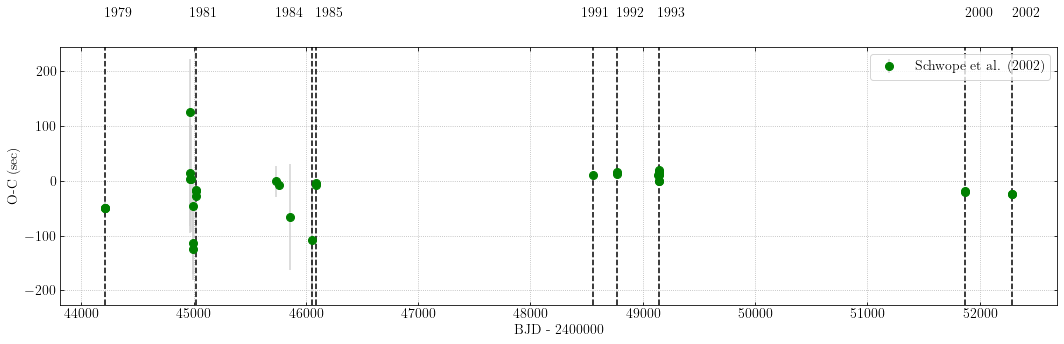

In [8]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2400000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 300, '1979')
plt.text(BJD_time_Schwope_2002[3], 300, '1981')
plt.text(BJD_time_Schwope_2002[13], 300, '1984')
plt.text(BJD_time_Schwope_2002[17], 300, '1985')
plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
plt.text(BJD_time_Schwope_2002[20], 300, '1992')
plt.text(BJD_time_Schwope_2002[22], 300, '1993')
plt.text(BJD_time_Schwope_2002[30], 300, '2000')
plt.text(BJD_time_Schwope_2002[32], 300, '2002')

plt.axvline(x= BJD_time_Schwope_2002[2], color='k', linestyle='--')
#plt.axvline(x= BJD_time_Schwope_2002[5], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[12], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[16], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[18], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[19], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[21], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[29], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[31], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[33], color='k', linestyle='--')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 7. Group the data for calculating weighted mean: Schwope_2002

In [9]:
#Checkinng month,year from BJD
BJD_time = Data_Schwope_2002[:,0]
OC_s = Data_Schwope_2002[:,4]
OC_s_err = Data_Schwope_2002[:,5]


gp1 = []
gp2 = []
gp3 = []
gp4 = []
gp5 = []
gp6 = []
gp7 = []
gp8 = []
gp9 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[2] >= BJD_time[i]:        #gp1
        gp1.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[12] >= BJD_time[i]:       #gp2
        gp2.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[16] >= BJD_time[i]:       #gp3
        gp3.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[18] >= BJD_time[i]:       #gp4
        gp4.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[19] >= BJD_time[i]:       #gp5
        gp5.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[21] >= BJD_time[i]:       #gp6
        gp6.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[29] >= BJD_time[i]:       #gp7
        gp7.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp8
        gp8.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[33] >= BJD_time[i]:       #gp9
        gp9.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
#-------------------------- Group1 -----------#        
rerults = gp1
f = open('Weighted_mean_calculation_gp1.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group2 -----------#        
rerults = gp2
f = open('Weighted_mean_calculation_gp2.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group3 -----------#        
rerults = gp3
f = open('Weighted_mean_calculation_gp3.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group4 -----------#        
rerults = gp4
f = open('Weighted_mean_calculation_gp4.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group5 -----------#        
rerults = gp5
f = open('Weighted_mean_calculation_gp5.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group6 -----------#        
rerults = gp6
f = open('Weighted_mean_calculation_gp6.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group7 -----------#        
rerults = gp7
f = open('Weighted_mean_calculation_gp7.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group8 -----------#        
rerults = gp8
f = open('Weighted_mean_calculation_gp8.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group9 -----------#        
rerults = gp9
f = open('Weighted_mean_calculation_gp9.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 1979-12-07 13:16:40.799989 44214.55325 -50.135618 13.684344
1 1979-12-07 14:46:29.567984 44214.61562 -49.516846 13.684307
2 1979-12-07 16:16:17.472013 44214.67798 -49.762073 13.68427
3 1981-12-30 00:33:14.975982 44968.02309 125.071383 97.396544
4 1981-12-30 22:58:15.167993 44968.95712 3.024968 97.396479
5 1981-12-31 00:28:15.167993 44969.01962 14.87574 97.396474
6 1982-01-09 23:56:28.319997 44978.99755 4.151309 97.395784
7 1982-01-24 21:37:07.391982 44993.90078 -124.442109 57.484751
8 1982-01-24 23:07:07.391982 44993.96328 -112.591337 57.484744
9 1982-01-25 00:38:02.688000 44994.02642 -45.444565 57.484736
10 1982-02-20 21:43:23.231987 45020.90513 -17.217702 17.972785
11 1982-02-21 21:40:12.287981 45021.90292 -18.549344 17.972416
12 1982-02-24 20:00:45.504011 45024.83386 -28.347046 57.48116
13 1984-02-01 23:11:36.959982 45731.9664 -0.983869 27.563353
14 1984-03-04 20:00:34.272006 45763.83373 -7.92722 4.602749
15 1984-06-03 21:11

#### 8. Check number of data for each group

In [10]:
#The 1st set of data point:
Input_gp1 = "Weighted_mean_calculation_gp1.txt"
Data_gp1   = np.genfromtxt(Input_gp1)
N_data_gp1 = len(Data_gp1)
print('Number of data group#1:',N_data_gp1)

#The 2nd set of data point:
Input_gp2 = "Weighted_mean_calculation_gp2.txt"
Data_gp2   = np.genfromtxt(Input_gp2)
N_data_gp2 = len(Data_gp2)
print('Number of data group#2:',N_data_gp2)

#The 3rd set of data point:
Input_gp3 = "Weighted_mean_calculation_gp3.txt"
Data_gp3   = np.genfromtxt(Input_gp3)
N_data_gp3 = len(Data_gp3)
print('Number of data group#3:',N_data_gp3)

#The 4th set of data point:
Input_gp4 = "Weighted_mean_calculation_gp4.txt"
Data_gp4   = np.genfromtxt(Input_gp4)
N_data_gp4 = len(Data_gp4)
print('Number of data group#4:',N_data_gp4)

#The 5th set of data point:
Input_gp5 = "Weighted_mean_calculation_gp5.txt"
Data_gp5   = np.genfromtxt(Input_gp5)
N_data_gp5 = len(Data_gp5)
print('Number of data group#5:',N_data_gp5)

#The 6th set of data point:
Input_gp6 = "Weighted_mean_calculation_gp6.txt"
Data_gp6   = np.genfromtxt(Input_gp6)
N_data_gp6 = len(Data_gp6)
print('Number of data group#6:',N_data_gp6)

#The 7th set of data point:
Input_gp7 = "Weighted_mean_calculation_gp7.txt"
Data_gp7   = np.genfromtxt(Input_gp7)
N_data_gp7 = len(Data_gp7)
print('Number of data group#7:',N_data_gp7)

#The 8th set of data point:
Input_gp8 = "Weighted_mean_calculation_gp8.txt"
Data_gp8   = np.genfromtxt(Input_gp8)
N_data_gp8 = len(Data_gp8)
print('Number of data group#8:',N_data_gp8)

#The 9th set of data point:
Input_gp9 = "Weighted_mean_calculation_gp9.txt"
Data_gp9   = np.genfromtxt(Input_gp9)
N_data_gp9 = len(Data_gp9)
print('Number of data group#9:',N_data_gp9)

Number of data group#1: 3
Number of data group#2: 10
Number of data group#3: 4
Number of data group#4: 2
Number of data group#5: 3
Number of data group#6: 2
Number of data group#7: 8
Number of data group#8: 2
Number of data group#9: 2


#### 9. Weighted mean calculation 

In [11]:
#Group1
OC_a1 = [i for i in range(N_data_gp1)]
OC_err_a1 = [i for i in range(N_data_gp1)]
w_a1 = [i for i in range(N_data_gp1)]
y_a1 = [i for i in range(N_data_gp1)]

for i in range(N_data_gp1):
    BJD_time = Data_gp1[:,0]                   #Input file of x
    OC_s = Data_gp1[:,1]                       #Input file of y
    OC_a1[i] = OC_s 
    OC_s_err = Data_gp1[:,2]                   #Input file of y_err
    OC_err_a1[i] = OC_s_err
    w = 1/(OC_err_a1[i])**2                    #calculate the weighting factor
    w_a1[i] = w
    y = (w_a1[i]*OC_a1[i])                     #Calculate the weighting factor and the y-value
    y_a1[i] = y
    y_sum = np.sum(y_a1)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a1)                       #Sum the weighting factor 
    dy = (w_a1[i]*OC_err_a1[i])/np.sum(w_a1[i])
#print(y_sum, w_sum)
x1_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y1_aver = y_sum/w_sum                         #Calculate the weighted mean
y1_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x1_aver)                   #Print Mean BJD
print('Weighted OC:', y1_aver)                #Print the weighted mean
print('Weighted OC_err:',y1_err)              #Print the error of the weighted mean

Mean BJD: 44214.61561666667
Weighted OC: -49.8048449933347
Weighted OC_err: 13.68430699986661


/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [12]:
#Group2
OC_a2 = [i for i in range(N_data_gp2)]
OC_err_a2 = [i for i in range(N_data_gp2)]
w_a2 = [i for i in range(N_data_gp2)]
y_a2 = [i for i in range(N_data_gp2)]

for i in range(N_data_gp2):
    BJD_time = Data_gp2[:,0]                   #Input file of x
    OC_s = Data_gp2[:,1]                       #Input file of y
    OC_a2[i] = OC_s 
    OC_s_err = Data_gp2[:,2]                   #Input file of y_err
    OC_err_a2[i] = OC_s_err
    w = 1/(OC_err_a2[i])**2                    #calculate the weighting factor
    w_a2[i] = w
    y = (w_a2[i]*OC_a2[i])                     #Calculate the weighting factor and the y-value
    y_a2[i] = y
    y_sum = np.sum(y_a2)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a2)                       #Sum the weighting factor 
    dy = (w_a2[i]*OC_err_a2[i])/np.sum(w_a2[i])
#print(y_sum, w_sum)
x2_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y2_aver = y_sum/w_sum                         #Calculate the weighted mean
y2_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x2_aver)                   #Print Mean BJD
print('Weighted OC:', y2_aver)                #Print the weighted mean
print('Weighted OC_err:',y2_err)              #Print the error of the weighted mean

Mean BJD: 44993.45297700001
Weighted OC: -24.192924258542394
Weighted OC_err: 28.36639001519582


In [13]:
#Group3
OC_a3 = [i for i in range(N_data_gp3)]
OC_err_a3 = [i for i in range(N_data_gp3)]
w_a3 = [i for i in range(N_data_gp3)]
y_a3 = [i for i in range(N_data_gp3)]

for i in range(N_data_gp3):
    BJD_time = Data_gp3[:,0]                   #Input file of x
    OC_s = Data_gp3[:,1]                       #Input file of y
    OC_a3[i] = OC_s 
    OC_s_err = Data_gp3[:,2]                   #Input file of y_err
    OC_err_a3[i] = OC_s_err
    w = 1/(OC_err_a3[i])**2                    #calculate the weighting factor
    w_a3[i] = w
    y = (w_a3[i]*OC_a3[i])                     #Calculate the weighting factor and the y-value
    y_a3[i] = y
    y_sum = np.sum(y_a3)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a3)                       #Sum the weighting factor 
    dy = (w_a3[i]*OC_err_a3[i])/np.sum(w_a3[i])
#print(y_sum, w_sum)
x3_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y3_aver = y_sum/w_sum                         #Calculate the weighted mean
y3_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x3_aver)                   #Print Mean BJD
print('Weighted OC:', y3_aver)                #Print the weighted mean
print('Weighted OC_err:',y3_err)              #Print the error of the weighted mean

Mean BJD: 45851.40630999999
Weighted OC: -8.080834963901271
Weighted OC_err: 5.624653069773111


In [14]:
#Group4
OC_a4 = [i for i in range(N_data_gp4)]
OC_err_a4 = [i for i in range(N_data_gp4)]
w_a4 = [i for i in range(N_data_gp4)]
y_a4 = [i for i in range(N_data_gp4)]

for i in range(N_data_gp4):
    BJD_time = Data_gp4[:,0]                   #Input file of x
    OC_s = Data_gp4[:,1]                       #Input file of y
    OC_a4[i] = OC_s 
    OC_s_err = Data_gp4[:,2]                   #Input file of y_err
    OC_err_a4[i] = OC_s_err
    w = 1/(OC_err_a4[i])**2                    #calculate the weighting factor
    w_a4[i] = w
    y = (w_a4[i]*OC_a4[i])                     #Calculate the weighting factor and the y-value
    y_a4[i] = y
    y_sum = np.sum(y_a4)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a4)                       #Sum the weighting factor 
    dy = (w_a4[i]*OC_err_a4[i])/np.sum(w_a4[i])
#print(y_sum, w_sum)
x4_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y4_aver = y_sum/w_sum                         #Calculate the weighted mean
y4_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x4_aver)                   #Print Mean BJD
print('Weighted OC:', y4_aver)                #Print the weighted mean
print('Weighted OC_err:',y4_err)              #Print the error of the weighted mean

Mean BJD: 46086.966805000004
Weighted OC: -5.470569822251493
Weighted OC_err: 3.586688499039643


In [15]:
#Group5
Input_gp5 = "Weighted_mean_calculation_gp5.txt"
Data_gp5   = np.genfromtxt(Input_gp5)

x5_aver = Data_gp5[0]
y5_aver = Data_gp5[1]
y5_err =  Data_gp5[2]

In [16]:
#Group6
OC_a6 = [i for i in range(N_data_gp6)]
OC_err_a6 = [i for i in range(N_data_gp6)]
w_a6 = [i for i in range(N_data_gp6)]
y_a6 = [i for i in range(N_data_gp6)]

for i in range(N_data_gp6):
    BJD_time = Data_gp6[:,0]                   #Input file of x
    OC_s = Data_gp6[:,1]                       #Input file of y
    OC_a6[i] = OC_s 
    OC_s_err = Data_gp6[:,2]                   #Input file of y_err
    OC_err_a6[i] = OC_s_err
    w = 1/(OC_err_a6[i])**2                    #calculate the weighting factor
    w_a6[i] = w
    y = (w_a6[i]*OC_a6[i])                     #Calculate the weighting factor and the y-value
    y_a6[i] = y
    y_sum = np.sum(y_a6)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a6)                       #Sum the weighting factor 
    dy = (w_a6[i]*OC_err_a6[i])/np.sum(w_a6[i])
#print(y_sum, w_sum)
x6_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y6_aver = y_sum/w_sum                         #Calculate the weighted mean
y6_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x6_aver)                   #Print Mean BJD
print('Weighted OC:', y6_aver)                #Print the weighted mean
print('Weighted OC_err:',y6_err)              #Print the error of the weighted mean

Mean BJD: 48773.714009999996
Weighted OC: 13.9393548401436
Weighted OC_err: 2.2643994999997794


In [17]:
#Group7
OC_a7 = [i for i in range(N_data_gp7)]
OC_err_a7 = [i for i in range(N_data_gp7)]
w_a7 = [i for i in range(N_data_gp7)]
y_a7 = [i for i in range(N_data_gp7)]

for i in range(N_data_gp7):
    BJD_time = Data_gp7[:,0]                   #Input file of x
    OC_s = Data_gp7[:,1]                       #Input file of y
    OC_a7[i] = OC_s 
    OC_s_err = Data_gp7[:,2]                   #Input file of y_err
    OC_err_a7[i] = OC_s_err
    w = 1/(OC_err_a7[i])**2                    #calculate the weighting factor
    w_a7[i] = w
    y = (w_a7[i]*OC_a7[i])                     #Calculate the weighting factor and the y-value
    y_a7[i] = y
    y_sum = np.sum(y_a7)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a7)                       #Sum the weighting factor 
    dy = (w_a7[i]*OC_err_a7[i])/np.sum(w_a7[i])
#print(y_sum, w_sum)
x7_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y7_aver = y_sum/w_sum                         #Calculate the weighted mean
y7_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x7_aver)                   #Print Mean BJD
print('Weighted OC:', y7_aver)                #Print the weighted mean
print('Weighted OC_err:',y7_err)              #Print the error of the weighted mean

Mean BJD: 49143.77505
Weighted OC: 10.277921141478602
Weighted OC_err: 2.3175381474011543


In [18]:
#Group8
OC_a8 = [i for i in range(N_data_gp8)]
OC_err_a8 = [i for i in range(N_data_gp8)]
w_a8 = [i for i in range(N_data_gp8)]
y_a8 = [i for i in range(N_data_gp8)]

for i in range(N_data_gp8):
    BJD_time = Data_gp8[:,0]                   #Input file of x
    OC_s = Data_gp8[:,1]                       #Input file of y
    OC_a8[i] = OC_s 
    OC_s_err = Data_gp8[:,2]                   #Input file of y_err
    OC_err_a8[i] = OC_s_err
    w = 1/(OC_err_a8[i])**2                    #calculate the weighting factor
    w_a8[i] = w
    y = (w_a8[i]*OC_a8[i])                     #Calculate the weighting factor and the y-value
    y_a8[i] = y
    y_sum = np.sum(y_a8)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a8)                       #Sum the weighting factor 
    dy = (w_a8[i]*OC_err_a8[i])/np.sum(w_a8[i])
#print(y_sum, w_sum)
x8_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y8_aver = y_sum/w_sum                         #Calculate the weighted mean
y8_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x8_aver)                   #Print Mean BJD
print('Weighted OC:', y8_aver)                #Print the weighted mean
print('Weighted OC_err:',y8_err)              #Print the error of the weighted mean

Mean BJD: 51870.839255
Weighted OC: -19.98764460351544
Weighted OC_err: 4.705403997734946


In [19]:
#Group9
OC_a9 = [i for i in range(N_data_gp9)]
OC_err_a9 = [i for i in range(N_data_gp9)]
w_a9 = [i for i in range(N_data_gp9)]
y_a9 = [i for i in range(N_data_gp9)]

for i in range(N_data_gp9):
    BJD_time = Data_gp9[:,0]                   #Input file of x
    OC_s = Data_gp9[:,1]                       #Input file of y
    OC_a9[i] = OC_s 
    OC_s_err = Data_gp9[:,2]                   #Input file of y_err
    OC_err_a9[i] = OC_s_err
    w = 1/(OC_err_a9[i])**2                    #calculate the weighting factor
    w_a9[i] = w
    y = (w_a9[i]*OC_a9[i])                     #Calculate the weighting factor and the y-value
    y_a9[i] = y
    y_sum = np.sum(y_a9)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a9)                       #Sum the weighting factor 
    dy = (w_a9[i]*OC_err_a9[i])/np.sum(w_a9[i])
#print(y_sum, w_sum)
x9_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y9_aver = y_sum/w_sum                         #Calculate the weighted mean
y9_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x9_aver)                   #Print Mean BJD
print('Weighted OC:', y9_aver)                #Print the weighted mean
print('Weighted OC_err:',y9_err)              #Print the error of the weighted mean

Mean BJD: 52284.71018
Weighted OC: -24.412751259453408
Weighted OC_err: 4.922079052121095


#### 10. Plo the O-C diagram of DP Leo

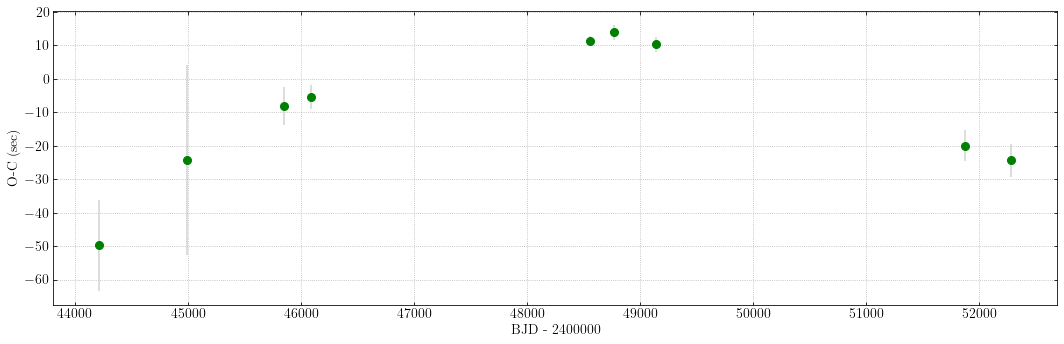

In [20]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2400000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x2_aver, y2_aver, yerr = y2_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x3_aver, y3_aver, yerr = y3_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x4_aver, y4_aver, yerr = y4_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x5_aver, y5_aver, yerr = y5_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x6_aver, y6_aver, yerr = y6_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x7_aver, y7_aver, yerr = y7_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x8_aver, y8_aver, yerr = y8_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x9_aver, y9_aver, yerr = y9_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)

#Schwope_2002
#plt.text(x1_aver, 62, '1979')
#plt.text(x2_aver, 62, '1981')
#plt.text(x3_aver-30, 62, '1984')
#plt.text(x4_aver+30, 62, '1985')
#plt.text(x5_aver-100, 62, '1991')
#plt.text(x6_aver, 62, '1992')
#plt.text(x7_aver, 62, '1993')
#plt.text(x8_aver, 62, '2000')
#plt.text(x9_aver, 62, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-100,60)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 11. Save the text file of Schwope et al.(2002) for the LTT fitting

In [21]:
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_01.out', np.c_[x1_aver, y1_aver, y1_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_02.out', np.c_[x2_aver, y2_aver, y2_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_03.out', np.c_[x3_aver, y3_aver, y3_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_04.out', np.c_[x4_aver, y4_aver, y4_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_05.out', np.c_[x5_aver, y5_aver, y5_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_06.out', np.c_[x6_aver, y6_aver, y6_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_07.out', np.c_[x7_aver, y7_aver, y7_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_08.out', np.c_[x8_aver, y8_aver, y8_err], fmt="%.5f")
np.savetxt('2022_May_week3_Weighted_mean_calculation_Schwope_2002_09.out', np.c_[x9_aver, y9_aver, y9_err], fmt="%.5f")

### Quadratic term fitting following Schwope et al. 2002

In [22]:
ls

2022_May_week3_Weighted_mean_calculation_Schwope_2002.ipynb*
2022_May_week3_Weighted_mean_calculation_Schwope_2002_01.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_02.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_03.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_04.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_05.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_06.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_07.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_08.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_09.out
2022_May_week3_Weighted_mean_calculation_Schwope_2002_combined.out
OC_Schwope_2002.jpg
Schwope_2002.dat*
Schwope_2002.out
Weighted_mean_calculation_gp1.txt
Weighted_mean_calculation_gp2.txt
Weighted_mean_calculation_gp3.txt
Weighted_mean_calculation_gp4.txt
Weighted_mean_calculation_gp5.txt
Weighted_mean_calculation_gp6.txt
Weighted_mean_calculation_gp7.txt
Weighted_mean_calculation_gp8.

In [23]:
#Plot O-C vs BJD
InputFileInput  = "2022_May_week3_Weighted_mean_calculation_Schwope_2002_combined.out"
Data   = np.genfromtxt(InputFileInput)
BJD = Data[:,0]
OC_s = Data[:,1]
OC_s_err = Data[:,2]

In [24]:
x = BJD
Epoch = (x - T0_bjd)/P0_day 
y = OC_s
dy = OC_s_err
len_x = len(x)

#print(Epoch)

In [25]:
m = 1
c = 1
Q = 1

def quad_fit(x,m,c,Q):
    Epoch = (x - T0_bjd)/P0_day 
    return m*Epoch + c + Q*Epoch*Epoch

In [26]:
import scipy.optimize as optimization  
guess = (m,c,Q)
params, params_covariance = optimization.curve_fit(quad_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

m = params[0]
c = params[1]
Q = params[2]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dQ = params_covariance[2,2]

oc_quad_fit = quad_fit(x,*params)

In [27]:
#The ephemeris from above
T0 = T0_bjd
dT0 = T0_bjd_err
P0 = P0_day
dP0 = P0_day_err


#print('The fitting parameters:')
##T
T = c/(24*60*60) + T0
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dT0**2))
#T = BJD0
#print('T0 (BJD):',T)
#print('dT0 (BJD):',dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print('P0 (days):',Period)
#print('dP0 (days):',dPeriod)


#Period decrease
P_dot = 2*Q/(P0*24*60*60)
dP_dot = (2*(P0*24*60*60)*(dQ**0.5) - 2*Q*(dP0*24*60*60))/((P0*24*60*60)**2)
#print('P_dot (s/s):',P_dot)
#print('dP_dot (s/s):',dP_dot)

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T)),'+/-', str('%0.5f' %(dT)), "[days]")
print('P_bin = '+str('%0.10f' %(Period)),'+/-', str('%0.10f' %(dPeriod)), "[days]")
print('P_dot = '+str('%0.13f' %(P_dot)),'+/-', str('%0.13f' %(dP_dot)), "[s/s]")


The fitting parameters:
T0 = 48773.21508 +/- 0.00003 [days]
P_bin = 0.0623628376 +/- 0.0000000010 [days]
P_dot = -0.0000000000041 +/- 0.0000000000002 [s/s]


In [28]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
print(len(x_line))
y_line = quad_fit(x_line, *params) #### For all interporation 
ys = quad_fit(x, *params)

print(len(y_line))
print(len(ys))

Residual = y - ys

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 3
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq_lnquad= sum(Chi_sqr)
print(Reduced_chisq_lnquad)

50
50
9
0.29534446542394377


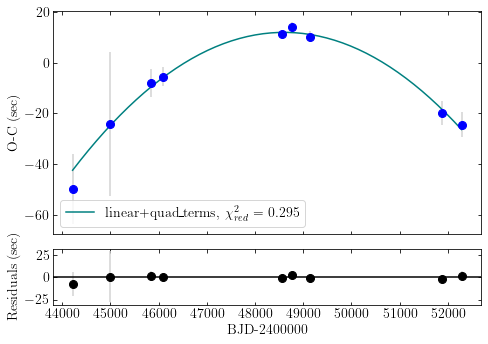

In [29]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(7, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='teal',label='linear+quad\_terms, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')
ax0.legend(loc="best")

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [30]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = quad_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_lnquad_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnquad_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnquad = Data_out[:,1]
y_range_lnquad = Data_out[:,2]

#print(y_range)

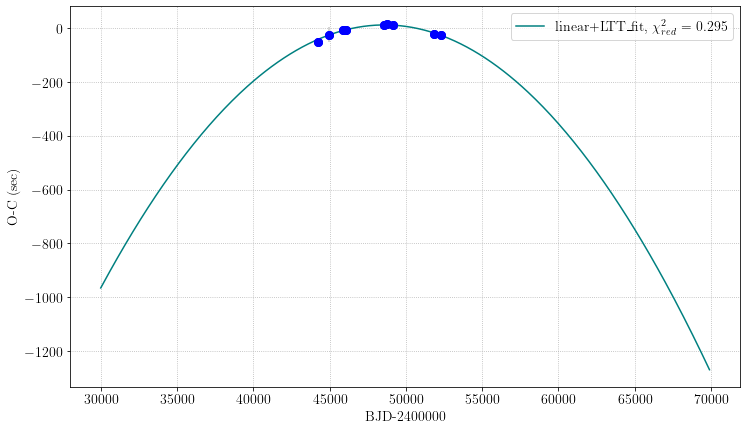

In [31]:
#Plotgraph
fig=plt.figure(figsize=(12, 7))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_range_lnquad, y_range_lnquad, '-', color='teal',label='linear+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_lnsin_fit.pdf", dpi=1200)
plt.show()